## Final Project
### DATA 620 - Web Analytics
### Group 3
+ Rajwant Mishra
+ Md. Jalal Uddin
+ Sarah Wigodsky

YouTube : [Link](https://youtu.be/OV-SbhSajHc) 

<b>Introduction</b>

A dataset of books about US politics published around the 2004 presidential election and sold by Amazon will be used to analyze the relationships between book buyers and the political views expressed in books.  The techniques of social network analysis will be employed to identify relationships between books bought by the same buyers.  Sentiment analysis will be conducted to determine if there is a relationship between the political views expressed in the books and whether the title (or content as expressed in a summary) of the book is positive or negative.  Machine learning models will be run to predict whether the political views expressed in the book are liberal, conservative or neutral.    

<b>Dataset</b>

The dataset is a gml file that contains the names of the books and lists links between books that were bought by the same buyer.  The dataset was complied by Valdis Krebs and can be found at http://www-personal.umich.edu/~mejn/netdata/

Nodes represent books about US politics sold by the online bookseller Amazon.com.  Edges represent frequent co-purchasing of books by the same buyers, as indicated by the "customers who bought this book also bought these other books" feature on Amazon.

Nodes have been given values "l", "n", or "c" to indicate whether they are "liberal", "neutral", or "conservative".  These alignments were assigned separately by Mark Newman based on a reading of the descriptions and reviews of the books posted on Amazon.

These data should be cited as V. Krebs, unpublished, http://www.orgnet.com/.

In [3]:
#import libraries
import networkx as nx
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
from nltk.corpus import stopwords as sw
import nltk
import string
import re
import pickle # For storing our data object in file system for latter use
from wordcloud import WordCloud
# !pip install textblob
# Package for Sentiment Analysis
from textblob import TextBlob
pd.set_option('display.max_colwidth',100)

In [4]:
#load data
pol_books = nx.read_gml('polbooks.gml')

In [5]:
pol_books

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


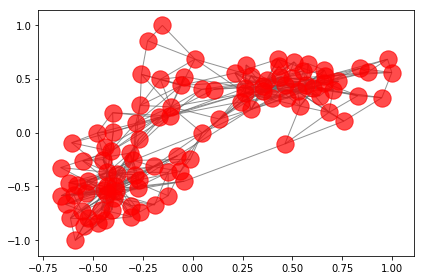

In [6]:
# Draw the graph adding alpha, removing labels, and softening edge color
nx.draw_networkx(pol_books,  alpha=0.7, with_labels=False, edge_color='.4')
plot.tight_layout();

The network graph above displays books that were bought by the same buyers.  There are two clusters that displays many connections between books bought by the same buyers. 

Full Network Considering Poltical Leanings <br> Legend
+ Liberal Books - Orange - 40.95%
+ Conservative Books - Blue - 46.67%
+ Neutral Books - Green - 12.38%
<img src="SNA_graph_cln21.png" width="800">

The graph above displays the network color coded by the political views expressed in the books.  The two clusters seen in the original network graph can now be identified as belonging to conservative books bought by the same buyers and liberal books bought by the same buyers.  Interestingly, the books designated as neutral largely span the space connecting the liberal-book cluster with the conservative-book cluster.  There are more books designated as conservative than books designated as liberal and many more partisan books than neutral books.

In [7]:
#number of nodes and edges
num_nodes = pol_books.number_of_nodes()
print ('The number of nodes: ' + str(num_nodes))
num_edges = pol_books.number_of_edges()
print ('The number of edges: ' + str(num_edges))

The number of nodes: 105
The number of edges: 441


This is a fairly small dataset, consisting of 105 political books.  There are 441 connections between books, indicating books that were bought by the same buyer.

### Degree Centrality

Degree centrality measures the number of nodes a given node is connected to.  In this case, a book's degree measures the number of books buyers of that book also bought.  A book with a high degree centrality indicates that a buyer is likely to buy that book as well as another book within the dataset.

In [8]:
#access party affiliation and convert from dictionary to data frame
party_affiliation = nx.get_node_attributes(pol_books,'value')
party_affiliation_df = pd.DataFrame([party_affiliation])
party_affiliation_df = party_affiliation_df.T
party_affiliation_df = party_affiliation_df.reset_index()
party_affiliation_df.columns = ["Book","Political_View"]
party_affiliation_df.head()

,Book,Political_View
0,1000 Years for Revenge,n
1,A National Party No More,c
2,Against All Enemies,l
3,All the Shah's Men,n
4,Allies,c


In [9]:
#Degree Centrality
df = pd.DataFrame(sorted(pol_books.degree, key=lambda x: x[1], reverse=True))
df.columns = ["Book","Degree"]
df = pd.merge(df,party_affiliation_df, on='Book')
df.head(10)

,Book,Degree,Political_View
0,A National Party No More,25,c
1,Off with Their Heads,25,c
2,Losing Bin Laden,23,c
3,Bushwhacked,23,l
4,American Dynasty,22,l
5,The Great Unraveling,21,l
6,Big Lies,21,l
7,The Price of Loyalty,20,l
8,Legacy,18,c
9,Deliver Us from Evil,18,c


There are two books with a degree centrality of 25.  A <i>National Party No More</i> and <i>Off with Their Heads</i> were both 
connected to 25 other books.  This means that a buyer who bought one of those books is likely have bought one of another 25 books in the dataset.  Both of those books are conservative books.  Out of the top 10 books with the highest degree value, 5 are conservatice and 5 are liberal. 

In [10]:
df.groupby('Political_View')['Degree'].mean()

Political_View
c    8.693878
l    8.837209
n    5.846154
Name: Degree, dtype: float64

The mean number of conservative books connected to other books is 8.7 and the mean number of liberal books connected to other books is 8.8.  This means that on average a user who bought a conservative or liberal book is likely to have bought one of 9 other books within the data set.  The mean number of neutral-leaning books connected to other books is 5.8.  A buyer who bought a neutral political book is likely to have bought one of 6 other books within the dataset. 

Network of the Books with Degree Centrality Greater than 18 
<br> Legend
+ Liberal Books - Orange 
+ Conservative Books - Blue 
+ Neutral Books - Green 
<img src="SNA_degreeAbove18_size.png" width="400">

The network graph above displays the connections between books with degree centralities greater than 18.  The size of the nodes is proportional to its degree.  These are books tended to be bought by people who bought at least one of 18 other political books in the dataset.  There are no neutral books that were bought that were linked to as many as 18 other books  Among the books that were most connected to other books, the liberal books are only connected to other liberal books and the conservative books are only connected to other conservative books.  There are about the same number of liberal and conservative books with the highest degree centralities.  

###### Lowest Degree Centrality

In [11]:
df.tail(10)

,Book,Degree,Political_View
95,Living History,4,l
96,We're Right They're Wrong,4,l
97,Buck Up Suck Up,4,l
98,Betrayal,3,c
99,Meant To Be,3,n
100,All the Shah's Men,3,n
101,Things Worth Fighting For,3,c
102,Freethinkers,3,l
103,Empire,3,n
104,The Future of Freedom,2,n


The lowest book with the lowest degree centality it <i>The Future of Freedom</i>, which was only bought buy a buyer who bought one other book.  Of the books with the lowest degree centalities, 4 are liberal, 2 are conservative and 4 are neutral.  Considering how few books are neutral, having 4 in the lowest 10 indicates that buyers who buy those books were less likely to buy another political book included in this list.

### Eigenvector Centrality
Eigenvector centrality measures the signficance of a book by taking into account the number of connections the book has and whether books they are connected to also are connected to a lot of books.  A book with a high eigenvector centrality measures how many other books buyers also bought as well as the significance of those other books that buyers bought.

In [12]:
#eigenvector centality calculated through Gephi
gephi_eigen = pd.read_csv('gephi_eigen.csv')
gephi_eigen.drop('Id', axis=1, inplace=True)
gephi_eigen.drop('timeset', axis=1, inplace=True)
gephi_eigen = gephi_eigen.sort_values(by='eigencentrality', ascending=False)
gephi_eigen.head(10)

,Label,value,eigencentrality
8,A National Party No More,c,1.000000
84,Bushwhacked,l,0.988461
12,Off with Their Heads,c,0.960619
73,Big Lies,l,0.945816
72,American Dynasty,l,0.907270
30,The Price of Loyalty,l,0.888066
66,The Great Unraveling,l,0.862778
3,Losing Bin Laden,c,0.836998
74,The Lies of George W. Bush,l,0.801199
75,Worse Than Watergate,l,0.788300


There are 3 conservative books and 7 liberal books with the highest eigenvector centrality according to Gephi.  This list  closely matches the list of books with the highest degree centrality.  The values calculated by Gephi are normalized so that the book with the highest eigenvector centrality is given a value of 1.

Books with high eigenvector centralities are weighted much more heavily toward liberal books.  Liberal books have more influence than conservative books.

The following network graph displays the books with the top eigenvector centralities according to Gephi.

<br> Legend
+ Liberal Books - Orange 
+ Conservative Books - Blue 
+ Neutral Books - Green 
<img src="eigen_centrality2.png" width="400">

Among the books with the highest eigenvector centralities, the liberal books are only connected to other liberal books and conservative books are only connected to other conservative books.

##### Lowest Eigenvector Centrality

In [13]:
gephi_eigen.tail(10)

,Label,value,eigencentrality
68,Soft Power,l,0.113258
56,We Will Prevail,c,0.110635
59,Downsize This!,l,0.100030
61,Rush Limbaugh Is a Big Fat Idiot,l,0.092276
63,The Culture of Fear,l,0.091882
102,Buck Up Suck Up,l,0.083068
69,Colossus,n,0.079047
2,Charlie Wilson's War,c,0.075388
104,Empire,n,0.029077
103,The Future of Freedom,n,0.021140


The categories of books with the lowest degree centrality, is similar to the categories for the lowest eigenvector centralities.  There are 5 liberal books, 2 conservative books and 3 neutral books with the lowest eigenvector centralities.  These are the least influential books.

### Text Analysis of Book Summaries
- Book summaries and ratings were taken from Amazon.  These will be used to identify patterns between the political leaning of the book and the words in the summary.

In [14]:
#load data with book summary
book_summary_df = pd.read_csv('Book_Review.csv', encoding = 'unicode_escape')
book_summary_df = pd.DataFrame(book_summary_df)
book_summary_df = book_summary_df.drop('timeset ', axis=1)
book_summary_df.head()

,Id,Label,value,eigencentrality,Rating,Author,Summary
0,0,1000 Years for Revenge,n,0.155600,4.5,Peter Lance,1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence o...
1,1,Bush vs. the Beltway,c,0.130480,3.0,Laurie Mylroie,"As the dust settles over Baghdad, a leading expert on Iraq tells the story of the obstacles that..."
2,2,Charlie Wilson's War,c,0.075388,4.5,George Crile,The bestselling true story of a Texas congressmans secret role in the Afghan defeat of Russian ...
3,3,Losing Bin Laden,c,0.836998,3.7,Richard Miniter,Journalist Rich Miniter uses his unparalleled access to sources and stories throughout the Middl...
4,4,Sleeping With the Devil,n,0.213104,4.4,Robert Baer,Saudi Arabia is more and more an irrational statea place that spawns global terrorism even as ...


### Remove Punctuation and html Tags

In [15]:
#remove html tags
#remove punctuation
def remove_punct(text):
    text = re.sub('<[^<]+?>', '', text)
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

book_summary_df['summary_clean'] = book_summary_df['Summary'].apply(lambda x: remove_punct(x))
book_summary_df.head()

,Id,Label,value,eigencentrality,Rating,Author,Summary,summary_clean
0,0,1000 Years for Revenge,n,0.155600,4.5,Peter Lance,1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence o...,1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence o...
1,1,Bush vs. the Beltway,c,0.130480,3.0,Laurie Mylroie,"As the dust settles over Baghdad, a leading expert on Iraq tells the story of the obstacles that...",As the dust settles over Baghdad a leading expert on Iraq tells the story of the obstacles that ...
2,2,Charlie Wilson's War,c,0.075388,4.5,George Crile,The bestselling true story of a Texas congressmans secret role in the Afghan defeat of Russian ...,The bestselling true story of a Texas congressmans secret role in the Afghan defeat of Russian ...
3,3,Losing Bin Laden,c,0.836998,3.7,Richard Miniter,Journalist Rich Miniter uses his unparalleled access to sources and stories throughout the Middl...,Journalist Rich Miniter uses his unparalleled access to sources and stories throughout the Middl...
4,4,Sleeping With the Devil,n,0.213104,4.4,Robert Baer,Saudi Arabia is more and more an irrational statea place that spawns global terrorism even as ...,Saudi Arabia is more and more an irrational statea place that spawns global terrorism even as ...


### Tokenization
- Break sentences up into individual words

In [16]:
#split sentences into words and convert capital letters into lowercase
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

book_summary_df['summary_tokenized'] = book_summary_df['summary_clean'].apply(lambda x: tokenize(x.lower()))
book_summary_df.head()

,Id,Label,value,eigencentrality,Rating,Author,Summary,summary_clean,summary_tokenized
0,0,1000 Years for Revenge,n,0.155600,4.5,Peter Lance,1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence o...,1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence o...,"[1000, years, for, revenge, is, a, groundbreaking, investigative, work, that, uncovers, startlin..."
1,1,Bush vs. the Beltway,c,0.130480,3.0,Laurie Mylroie,"As the dust settles over Baghdad, a leading expert on Iraq tells the story of the obstacles that...",As the dust settles over Baghdad a leading expert on Iraq tells the story of the obstacles that ...,"[as, the, dust, settles, over, baghdad, a, leading, expert, on, iraq, tells, the, story, of, the..."
2,2,Charlie Wilson's War,c,0.075388,4.5,George Crile,The bestselling true story of a Texas congressmans secret role in the Afghan defeat of Russian ...,The bestselling true story of a Texas congressmans secret role in the Afghan defeat of Russian ...,"[the, bestselling, true, story, of, a, texas, congressman, s, secret, role, in, the, afghan, def..."
3,3,Losing Bin Laden,c,0.836998,3.7,Richard Miniter,Journalist Rich Miniter uses his unparalleled access to sources and stories throughout the Middl...,Journalist Rich Miniter uses his unparalleled access to sources and stories throughout the Middl...,"[journalist, rich, miniter, uses, his, unparalleled, access, to, sources, and, stories, througho..."
4,4,Sleeping With the Devil,n,0.213104,4.4,Robert Baer,Saudi Arabia is more and more an irrational statea place that spawns global terrorism even as ...,Saudi Arabia is more and more an irrational statea place that spawns global terrorism even as ...,"[, saudi, arabia, is, more, and, more, an, irrational, state, a, place, that, spawns, global, te..."


### Remove Stopwords

In [17]:
stopword = nltk.corpus.stopwords.words('english')
stopword.append('')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

book_summary_df['summary_nostop'] = book_summary_df['summary_tokenized'].apply(lambda x: remove_stopwords(x))

book_summary_df.head()

,Id,Label,value,eigencentrality,Rating,Author,Summary,summary_clean,summary_tokenized,summary_nostop
0,0,1000 Years for Revenge,n,0.155600,4.5,Peter Lance,1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence o...,1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence o...,"[1000, years, for, revenge, is, a, groundbreaking, investigative, work, that, uncovers, startlin...","[1000, years, revenge, groundbreaking, investigative, work, uncovers, startling, evidence, fbi, ..."
1,1,Bush vs. the Beltway,c,0.130480,3.0,Laurie Mylroie,"As the dust settles over Baghdad, a leading expert on Iraq tells the story of the obstacles that...",As the dust settles over Baghdad a leading expert on Iraq tells the story of the obstacles that ...,"[as, the, dust, settles, over, baghdad, a, leading, expert, on, iraq, tells, the, story, of, the...","[dust, settles, baghdad, leading, expert, iraq, tells, story, obstacles, stood, us, fall, saddam..."
2,2,Charlie Wilson's War,c,0.075388,4.5,George Crile,The bestselling true story of a Texas congressmans secret role in the Afghan defeat of Russian ...,The bestselling true story of a Texas congressmans secret role in the Afghan defeat of Russian ...,"[the, bestselling, true, story, of, a, texas, congressman, s, secret, role, in, the, afghan, def...","[bestselling, true, story, texas, congressman, secret, role, afghan, defeat, russian, invaders, ..."
3,3,Losing Bin Laden,c,0.836998,3.7,Richard Miniter,Journalist Rich Miniter uses his unparalleled access to sources and stories throughout the Middl...,Journalist Rich Miniter uses his unparalleled access to sources and stories throughout the Middl...,"[journalist, rich, miniter, uses, his, unparalleled, access, to, sources, and, stories, througho...","[journalist, rich, miniter, uses, unparalleled, access, sources, stories, throughout, middle, ea..."
4,4,Sleeping With the Devil,n,0.213104,4.4,Robert Baer,Saudi Arabia is more and more an irrational statea place that spawns global terrorism even as ...,Saudi Arabia is more and more an irrational statea place that spawns global terrorism even as ...,"[, saudi, arabia, is, more, and, more, an, irrational, state, a, place, that, spawns, global, te...","[saudi, arabia, irrational, state, place, spawns, global, terrorism, even, succumbs, ancient, de..."


### Stem Text in Summary
- remove suffixes from words

In [18]:
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

book_summary_df['summary_stemmed'] = book_summary_df['summary_nostop'].apply(lambda x: stemming(x))

book_summary_df.head()

,Id,Label,value,eigencentrality,Rating,Author,Summary,summary_clean,summary_tokenized,summary_nostop,summary_stemmed
0,0,1000 Years for Revenge,n,0.155600,4.5,Peter Lance,1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence o...,1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence o...,"[1000, years, for, revenge, is, a, groundbreaking, investigative, work, that, uncovers, startlin...","[1000, years, revenge, groundbreaking, investigative, work, uncovers, startling, evidence, fbi, ...","[1000, year, reveng, groundbreak, investig, work, uncov, startl, evid, fbi, miss, dozen, opportu..."
1,1,Bush vs. the Beltway,c,0.130480,3.0,Laurie Mylroie,"As the dust settles over Baghdad, a leading expert on Iraq tells the story of the obstacles that...",As the dust settles over Baghdad a leading expert on Iraq tells the story of the obstacles that ...,"[as, the, dust, settles, over, baghdad, a, leading, expert, on, iraq, tells, the, story, of, the...","[dust, settles, baghdad, leading, expert, iraq, tells, story, obstacles, stood, us, fall, saddam...","[dust, settl, baghdad, lead, expert, iraq, tell, stori, obstacl, stood, us, fall, saddam, reveal..."
2,2,Charlie Wilson's War,c,0.075388,4.5,George Crile,The bestselling true story of a Texas congressmans secret role in the Afghan defeat of Russian ...,The bestselling true story of a Texas congressmans secret role in the Afghan defeat of Russian ...,"[the, bestselling, true, story, of, a, texas, congressman, s, secret, role, in, the, afghan, def...","[bestselling, true, story, texas, congressman, secret, role, afghan, defeat, russian, invaders, ...","[bestsel, true, stori, texa, congressman, secret, role, afghan, defeat, russian, invad, tour, de..."
3,3,Losing Bin Laden,c,0.836998,3.7,Richard Miniter,Journalist Rich Miniter uses his unparalleled access to sources and stories throughout the Middl...,Journalist Rich Miniter uses his unparalleled access to sources and stories throughout the Middl...,"[journalist, rich, miniter, uses, his, unparalleled, access, to, sources, and, stories, througho...","[journalist, rich, miniter, uses, unparalleled, access, sources, stories, throughout, middle, ea...","[journalist, rich, minit, use, unparallel, access, sourc, stori, throughout, middl, east, africa..."
4,4,Sleeping With the Devil,n,0.213104,4.4,Robert Baer,Saudi Arabia is more and more an irrational statea place that spawns global terrorism even as ...,Saudi Arabia is more and more an irrational statea place that spawns global terrorism even as ...,"[, saudi, arabia, is, more, and, more, an, irrational, state, a, place, that, spawns, global, te...","[saudi, arabia, irrational, state, place, spawns, global, terrorism, even, succumbs, ancient, de...","[saudi, arabia, irrat, state, place, spawn, global, terror, even, succumb, ancient, deepli, seat..."


### Lemmatizing
Lemmatizing is using vocabulary analysis of words to remove inflectional endings and return to the dictionary form of a word. So again, type, typed, and typing would all be simplified down to type, because that's the root of the word. Each variation carries the same meaning just with slightly different tense.

In [19]:
# Initalize the Lemmitizer
wn = nltk.WordNetLemmatizer() 
# Lemmitizer function 
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

book_summary_df['summary_Lemmiteze'] = book_summary_df['summary_nostop'].apply(lambda x: lemmatizing(x))

book_summary_df[["Label","summary_stemmed","summary_Lemmiteze"]].head()




,Label,summary_stemmed,summary_Lemmiteze
0,1000 Years for Revenge,"[1000, year, reveng, groundbreak, investig, work, uncov, startl, evid, fbi, miss, dozen, opportu...","[1000, year, revenge, groundbreaking, investigative, work, uncovers, startling, evidence, fbi, m..."
1,Bush vs. the Beltway,"[dust, settl, baghdad, lead, expert, iraq, tell, stori, obstacl, stood, us, fall, saddam, reveal...","[dust, settle, baghdad, leading, expert, iraq, tell, story, obstacle, stood, u, fall, saddam, re..."
2,Charlie Wilson's War,"[bestsel, true, stori, texa, congressman, secret, role, afghan, defeat, russian, invad, tour, de...","[bestselling, true, story, texas, congressman, secret, role, afghan, defeat, russian, invader, t..."
3,Losing Bin Laden,"[journalist, rich, minit, use, unparallel, access, sourc, stori, throughout, middl, east, africa...","[journalist, rich, miniter, us, unparalleled, access, source, story, throughout, middle, east, a..."
4,Sleeping With the Devil,"[saudi, arabia, irrat, state, place, spawn, global, terror, even, succumb, ancient, deepli, seat...","[saudi, arabia, irrational, state, place, spawn, global, terrorism, even, succumbs, ancient, dee..."


Now we will encapsulate all this in one and create our Main data which we can use for further analysis. 
clean_text method cleans the text with following process:
+	Remove Punctuation
+	Tokenize 
+	Remove Stop words
+	Does Stemming and Lemmatizing
+	Returns unique Joins of both Stemmed and Lemmatized word if both is set True.


In [20]:
# All Function at one place 
def clean_text(text,stem=False,both=False):
    stopword = nltk.corpus.stopwords.words('english')
    stopword.append('book')
    # ps is porterstemmer 
    ps = nltk.PorterStemmer()
    wn = nltk.WordNetLemmatizer()
    # Return text2
    text2 = ""
    
      # Remove Punctuations
    text = re.sub('<[^<]+?>', '', text)
    text_nopunct = "".join([char.lower() for char in text if char not in string.punctuation])
    
    #Tokenized the Text 
    tokenized_list = re.split('\W+', text_nopunct)
    
    # Remove numbers 
    nonPunct = re.compile('.*[A-Za-z].*')
    tokenized_list = [word for word in tokenized_list if nonPunct.match(word)]
    
    
    # Remove stopwords from Tokenized words
    nostop_text = [word for word in tokenized_list if word not in stopword]
    
    # Lemitize and stem the token words
    if both == False:
        
        if stem==False:
            text = [wn.lemmatize(word) for word in nostop_text]
        else:
            text = [ps.stem(word) for word in nostop_text]
    else: # Do Lemmitization and Stemming , Only retrun stemmed word which are not same after lemmitization
        text_l = [wn.lemmatize(word) for word in nostop_text]
        text_s = [ps.stem(word) for word in nostop_text if wn.lemmatize(word) != ps.stem(word)]
        text = text_l
        text2 = text_s 
    if both == True:
        str_concat = " ".join(text)
        str_concat2 = " ".join(text2)
        return   "".join( str_concat +" " + str_concat2)
#     text = [word for word in text if nonPunct.match(word)]
    return " ".join(text)

**EXAMPLE** You can note that how “1000 Years for Revenge” got converted into  'year revenge reveng', here **revenge** is from Lemmatized and **reveng** is from stemming of the word


In [21]:
clean_text("1000 Years for Revenge",both = True)

'year revenge reveng'

In [22]:
book_summary_df['summary_final'] = book_summary_df['Summary'].apply(lambda x: clean_text(x,both = True))

book_summary_df[["Label","summary_final","summary_stemmed"][1]]
var = book_summary_df.loc[[1]]["summary_final"]
print(book_summary_df[["Label","summary_final","summary_stemmed"]].values[0])

['1000 Years for Revenge'
 'year revenge groundbreaking investigative work uncovers startling evidence fbi missed dozen opportunity stop attack september dating back awardwinning journalist peter lance explains elusive al qaeda mastermind defeated entire american security system author call greatest failure intelligence since trojan horse threading story fbi agent nancy floyd fdny fire marshal ronnie bucca bombmaker ramzi yousef lance uncovers year behindthescenes intrigue put three stranger collision course unparalleled work investigative reporting masterful storytelling year revenge change forever way look fbi war terror twentyfirst century reveng groundbreak investig uncov startl evid miss opportun septemb date awardwin lanc explain elus defeat entir secur failur intellig sinc hors thread stori nanci fdni ronni bombmak lanc uncov behindthescen intrigu collis cours unparallel investig report master storytel reveng chang forev centuri'
 list(['1000', 'year', 'reveng', 'groundbreak', '

Above we are listing all the words tokenized, also stemmed and Lemmatize.

### Working with CountVectorizer

CountVectorizer gives the list of wrods and frequency of each word for  the given document, I have passed ngram_range (1,2), which mean I am generating Tokens with one words and also Two words. <br>
For example if my sentence is :
“This is the final project” then result will include **final, project, final project**. We can see it the output matrix .



In [23]:
from sklearn.feature_extraction.text import CountVectorizer

#count_vect contains all of the values of the text after lower case, removing punctation, and stemming, removing stop words

count_vect = CountVectorizer(stop_words='english',ngram_range=(1, 2))
#X_count contains the frequency matrix of each word
Data_counts_Vect = count_vect.fit_transform(book_summary_df['summary_final'])

# Set the document term matrix with feature name in columns 
Data_dtm = pd.DataFrame(Data_counts_Vect.toarray(),columns=count_vect.get_feature_names())
# set the index as the Book Label from the Book_summary_df 
Data_dtm.index = book_summary_df.Label 

In [24]:
# View the Document Term Matrix with 
Data_dtm

,0man,0man earned,1950,1950 transform,1950s,1950s transformation,1960,1960 lewi,1960 oneil,1960s,...,zacarias,zacarias moussaoui,zealot,zealot gain,zell,zell miller,zone,zone bush,zone looking,zone noholdsbarred
Label,,,,,,,,,,,,,,,,,,,,,
1000 Years for Revenge,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bush vs. the Beltway,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Charlie Wilson's War,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Losing Bin Laden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sleeping With the Devil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Man Who Warned America,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Why America Slept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ghost Wars,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A National Party No More,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


* How many rows are present and How many columns are present , i.e. How many unique word we have 

In [25]:
print("Matrix Contains (Row, Columns):", Data_counts_Vect.shape)  # How many rows are present and How many columns are present , i.e. How many unique word we have 
print(count_vect.get_feature_names()[1:10]) # All the Unique words

Matrix Contains (Row, Columns): (105, 20860)
['0man earned', '1950', '1950 transform', '1950s', '1950s transformation', '1960', '1960 lewi', '1960 oneil', '1960s']


**What is pickle?** <br> it’s a way to save resulting model/variable from python to file system which can be read back latter and avoid the long runtime to build the variable /model again. 

In [26]:
# Lets pickle it for latter use
Data_dtm.to_pickle("Data_dtm.pkl")
# Pickle Final data and CountVectorizer
book_summary_df.to_pickle("book_summary_df.pkl")
pickle.dump(count_vect,open("count_vect.pkl","wb"))

In [27]:
book_summary_df.head(2)

,Id,Label,value,eigencentrality,Rating,Author,Summary,summary_clean,summary_tokenized,summary_nostop,summary_stemmed,summary_Lemmiteze,summary_final
0,0,1000 Years for Revenge,n,0.15560,4.5,Peter Lance,1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence o...,1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence o...,"[1000, years, for, revenge, is, a, groundbreaking, investigative, work, that, uncovers, startlin...","[1000, years, revenge, groundbreaking, investigative, work, uncovers, startling, evidence, fbi, ...","[1000, year, reveng, groundbreak, investig, work, uncov, startl, evid, fbi, miss, dozen, opportu...","[1000, year, revenge, groundbreaking, investigative, work, uncovers, startling, evidence, fbi, m...",year revenge groundbreaking investigative work uncovers startling evidence fbi missed dozen oppo...
1,1,Bush vs. the Beltway,c,0.13048,3.0,Laurie Mylroie,"As the dust settles over Baghdad, a leading expert on Iraq tells the story of the obstacles that...",As the dust settles over Baghdad a leading expert on Iraq tells the story of the obstacles that ...,"[as, the, dust, settles, over, baghdad, a, leading, expert, on, iraq, tells, the, story, of, the...","[dust, settles, baghdad, leading, expert, iraq, tells, story, obstacles, stood, us, fall, saddam...","[dust, settl, baghdad, lead, expert, iraq, tell, stori, obstacl, stood, us, fall, saddam, reveal...","[dust, settle, baghdad, leading, expert, iraq, tell, story, obstacle, stood, u, fall, saddam, re...",dust settle baghdad leading expert iraq tell story obstacle stood u fall saddam reveals many cam...


### Exploratory Data Aanalysis

* We will read the pickled data and transpose it to create **Document Term matrix**.
In this data matrix, Document (book) will be in Column, and wrods will be in rows.



In [28]:
data = pd.read_pickle('Data_dtm.pkl')

In [29]:
data = data.transpose() # creating Term Document Matrix

In [30]:
data.tail(6)

Label,1000 Years for Revenge,Bush vs. the Beltway,Charlie Wilson's War,Losing Bin Laden,Sleeping With the Devil,The Man Who Warned America,Why America Slept,Ghost Wars,A National Party No More,Bush Country,...,We're Right They're Wrong,What Liberal Media?,The Clinton Wars,Weapons of Mass Deception,"Dude, Where's My Country?",Thieves in High Places,Shrub,Buck Up Suck Up,The Future of Freedom,Empire
zell,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
zell miller,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
zone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zone bush,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zone looking,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zone noholdsbarred,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Top 10 Word from all the Books.

+ We have 100+ books summary, we will try to find top 10 words from all the books 
+ Top 5 words from Each Book


In [31]:

term = count_vect.get_feature_names()
count = Data_counts_Vect.toarray().sum(axis=0)
book_data_tfdf = pd.DataFrame({'Terms': term,'Count':count })
book_data_tfdf = book_data_tfdf[book_data_tfdf.Terms!=""]
book_data_tfdf.head()
# To calculate the Relative Frequency - frequency of word divided by total word count
total_count = book_data_tfdf['Count'].sum()
book_data_tfdf['Rel_Freq'] = book_data_tfdf['Count']/ total_count
book_data_tfdf.sort_values(by=['Count'],ascending=False,inplace=True)
book_data_tfdf.head(10)

,Terms,Count,Rel_Freq
2243,bush,91,0.002853
660,america,86,0.002696
12591,new,82,0.002571
13978,polit,72,0.002257
740,american,69,0.002163
14447,presid,68,0.002132
18819,time,66,0.002069
20111,war,66,0.002069
20617,world,61,0.001912
14251,power,54,0.001693


#### Top 5 words from Each Book
<Br>
* See top 5 Word from book : '1000 Years for Revenge'

In [32]:
# See top 5 Word from book : '1000 Years for Revenge'
data['1000 Years for Revenge'].sort_values(ascending=False).head(5)

fbi              3
year             3
investig         2
lanc             2
investigative    2
Name: 1000 Years for Revenge, dtype: int64

* Find top 10 word from Each Book's summary

In [33]:
# Find top 10 word from Each Book's summary
top_dict={}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(10)
    top_dict[c] = list(zip(top.index,top.values))

show = 5
show_ind=0
# Print the Info for 5 Books
for book, top_word in top_dict.items():
    if show == show_ind: break 
    show_ind = show_ind+1
    print("Book: ",book)
    print(', '.join([word for word , count in top_word[0:5]]))
    print("---")



# pd.DataFrame(top_dict.items(),columns=['Book','Top 5 Terms']).head(5)
# top_dict[:5]


Book:  1000 Years for Revenge
fbi, year, investig, lanc, investigative
---
Book:  Bush vs. the Beltway
iraq, state, saddam, reveal, agenc
---
Book:  Charlie Wilson's War
wilson, secret, afghan, congressman, avrakotos
---
Book:  Losing Bin Laden
bin, dangerous, unparallel, unit devast, devast
---
Book:  Sleeping With the Devil
saudi, al, baer, arabia, oil
---


## Find Frequency of words across the Book's Summary

Here we are trying to find how many words are common in the other books, we are only considering top 10 word from each Book summary and checking it against the each book's Top 10 terms from the book Summary, in the Corpus.
+ First take all the top 10 words
+ Aggregate the count for each word to find the Frequency across the books


In [34]:
# Lets see how many words are common in how many books
from collections import Counter

# Pull top 10 words from book summary stored in top_dict (above steps) and put it in the List of words
words= []
[words.append(word) for book in data.columns for (word, count) in top_dict[book]]
# for book in data.columns:  ## Long Code commented 
#     top = [word for (word, count) in top_dict[book]]
#     for t in top:        
#         words.append(t)

words[:10]

['fbi',
 'year',
 'investig',
 'lanc',
 'investigative',
 'work',
 'uncov',
 'lance',
 'uncovers',
 'year revenge']

In [35]:
top_dict['1000 Years for Revenge'][:4]

[('fbi', 3), ('year', 3), ('investig', 2), ('lanc', 2)]

In [36]:
# Using Counter we will aggregate this list and find how many Books contains these terms
common_across = Counter(words).most_common()
print("Top 5 most common words accros 105 books:",common_across[:5])
df_common_across = pd.DataFrame(common_across,columns=['Terms','Books containing Terms'])
df_common_across.head(5)

Top 5 most common words accros 105 books: [('america', 17), ('bush', 14), ('presid', 13), ('american', 12), ('polit', 11)]


,Terms,Books containing Terms
0,america,17
1,bush,14
2,presid,13
3,american,12
4,polit,11


### WordCloud

+ We will plot WordCloud with all the terms across the Book 
+ We will also plot WordCloud with all the words from each book.

In [37]:
# Creating a Dict for common_across so that we can pass it to Wordcloud function 
common_across_dict = {common_across[i][0]:common_across[i][1] for i in range(len(common_across)) }
common_across_dict['america'],common_across_dict['bush']


(17, 14)

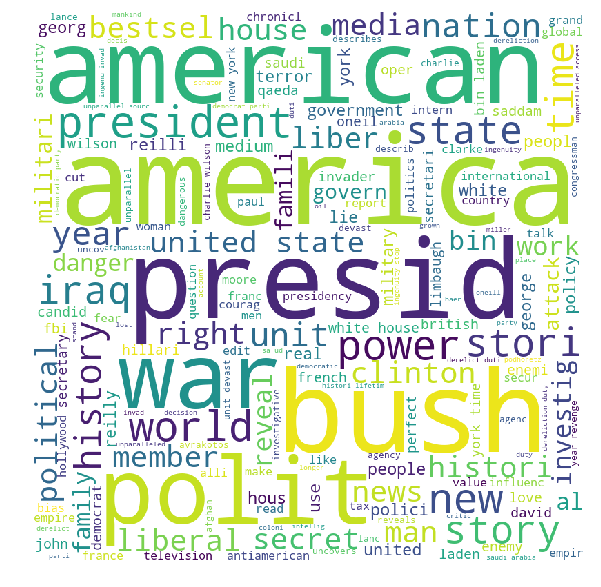

In [40]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopword, 
                min_font_size = 10).generate_from_frequencies(common_across_dict)
  
# plot the WordCloud image                        
plot.figure(figsize = (8, 8), facecolor = None) 
plot.imshow(wordcloud) 
plot.axis("off") 
plot.tight_layout(pad = 0) 
  
plot.show()

>The wordcloud above displays more frequency of words accross the Books from the **Top 10 words from each book summary** . So the word `America` and `bush` is used mostly accros more books, compared with order terms. 

**Plotting the WordCloud for each book and Terms**

We are disaply all books summary wordcloud but we will dispaly 1st nine books.

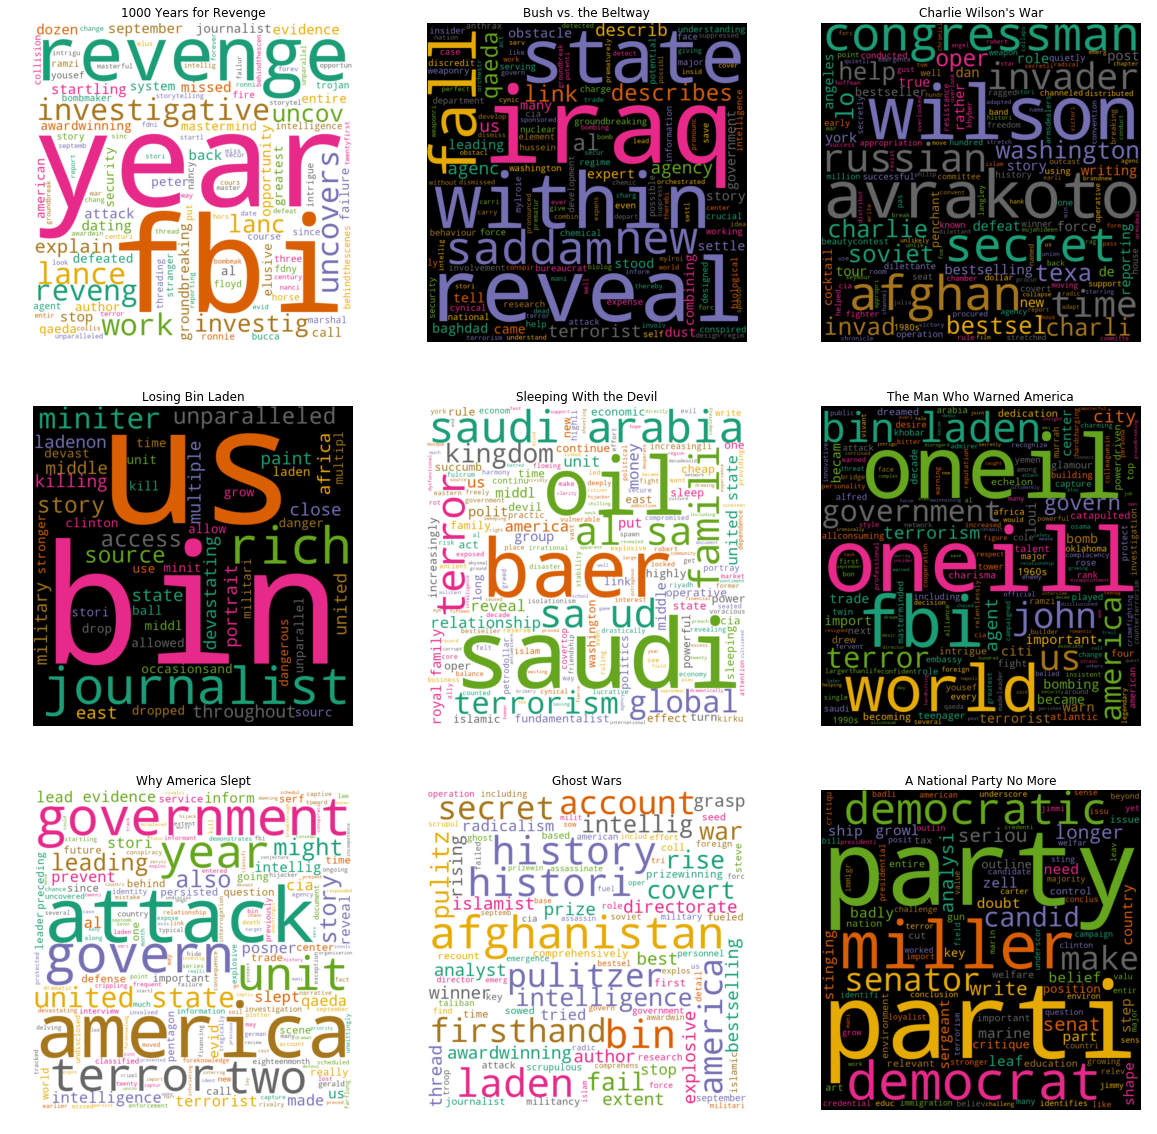

In [41]:
# Book name list for use in graph below 
book_name = book_summary_df.Label.tolist()
# Set plot size
plot.rcParams['figure.figsize']=[20,20]
for index, book in enumerate(data.columns[:9]):
    if book_summary_df.value[index] == 'n':
        wc = WordCloud(width = 800, height = 800, colormap="Dark2",
                background_color ='white', 
                stopwords = stopword, 
                min_font_size = 10)
    elif book_summary_df.value[index] == 'c':
        wc = WordCloud(width = 800, height = 800, colormap="Dark2",
                background_color ='black', 
                stopwords = stopword, 
                min_font_size = 10) 
    else:
        wc = WordCloud(width = 800, height = 800, colormap="Dark2",
        background_color ='red', 
        stopwords = stopword, 
        min_font_size = 10) 
        
    wc.generate(book_summary_df.summary_final[index])
    # plot the WordCloud image
    cmap = plot.cm.get_cmap("winter")
    cmap.set_under("magenta")
    cmap.set_over("yellow")

    plot.subplot(3, 3, index+1)     
    plot.imshow(wc,interpolation="bilinear")  
    plot.axis("off") 
    plot.set_cmap('jet')
    plot.title(book_name[index])
plot.show()

By looking at the WordCloud we noted that each books suammry can be helpfull identifying the key words from the book.

### Top 200 Terms from All Books
We will plot top 200 terms by their count and  also we will calculate Relative Frequency



In [42]:
# Get the 1st 200 data from  book_data_tfdf  
most_words = book_data_tfdf.head(200)
#most_words = most_words.groupby('Count')
most_words.head(5)

,Terms,Count,Rel_Freq
2243,bush,91,0.002853
660,america,86,0.002696
12591,new,82,0.002571
13978,polit,72,0.002257
740,american,69,0.002163


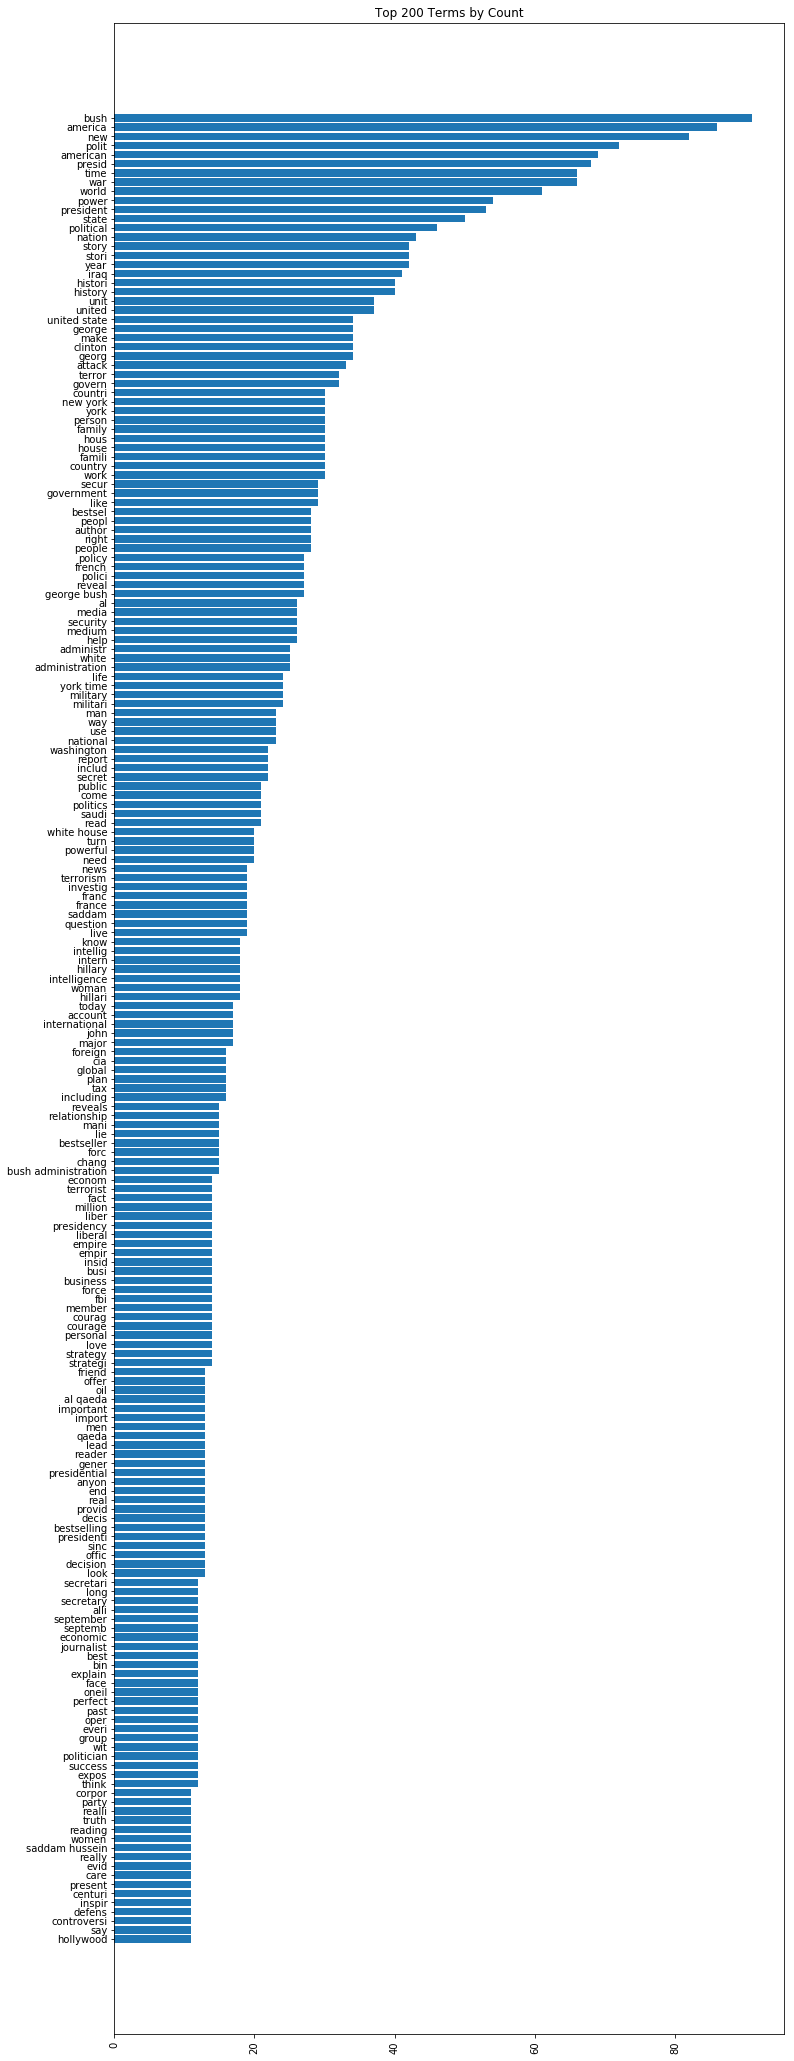

In [43]:
#plot the top 200 words with the highest frequencies 
plot.xticks(rotation=90)

plot.barh(range(len(most_words.Terms.tolist())),most_words.Count.tolist())
plot.yticks(range(len(most_words.Terms.tolist())),most_words.Terms.tolist())

plot.gca().invert_yaxis()
fig = plot.gcf()
fig.set_size_inches(12, 37, forward=True)
plot.title("Top 200 Terms by Count")

plot.show()

#### Vocabulary

We will see how certain terms is used in the book's summary. I am trying to find how many times the words is used in other books. 
So here we are trying to see ['bush','america','american'] and convert it into data frame group of Leader ['bush'] and Nation ['america','american']. Then see how often these words came in the other books.


In [44]:
df_ba = data.transpose()[['bush','america','american']]
df_data_profanity = pd.concat([df_ba.bush,df_ba.america+df_ba.american],axis=1)
df_data_profanity.columns = ['Leader','Nation']
df_data_profanity.head()

,Leader,Nation
Label,,
1000 Years for Revenge,0,1
Bush vs. the Beltway,0,0
Charlie Wilson's War,0,0
Losing Bin Laden,0,0
Sleeping With the Devil,0,4


In [45]:
#Adding some noise to data so that we can visualise it 
import numpy as np
mu, sigma = 0, 0.5
z = np.random.normal(mu, sigma,  1)  # noise
z


array([-0.02322152])

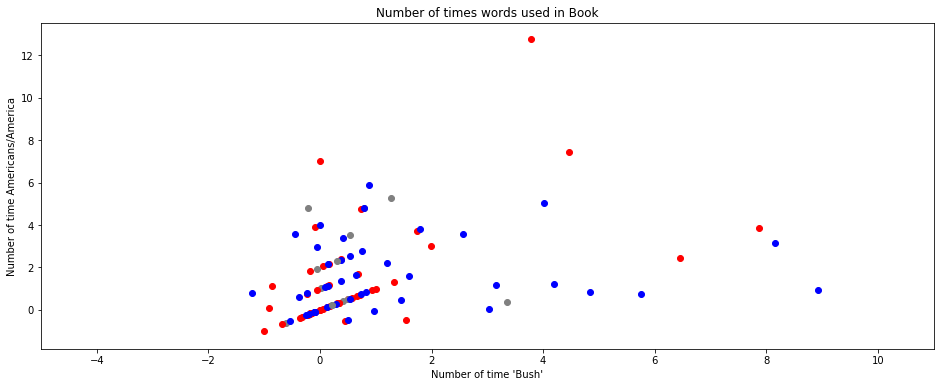

In [57]:
plot.rcParams['figure.figsize'] =[16,6]
for i , book in enumerate(df_data_profanity.index):
    mu, sigma = 0, 0.5
    z = np.random.normal(mu, sigma, 1)  # noise
    x = z + df_data_profanity.Leader.loc[book]
    y = z + df_data_profanity.Nation.loc[book]
    if book_summary_df.value[i] == 'n':
        plot.scatter(x,y,color = 'gray')
#         print(x,y)
    elif book_summary_df.value[i] == 'c':
        plot.scatter(x,y,color = 'red')
    else:
        plot.scatter(x,y,color = 'blue')      
    
    plot.xlim(-5,11)

plot.title("Number of times words used in Book")
plot.xlabel("Number of time 'Bush'")
plot.ylabel("Number of time Americans/America")
plot.show()

**Same plot with some name**

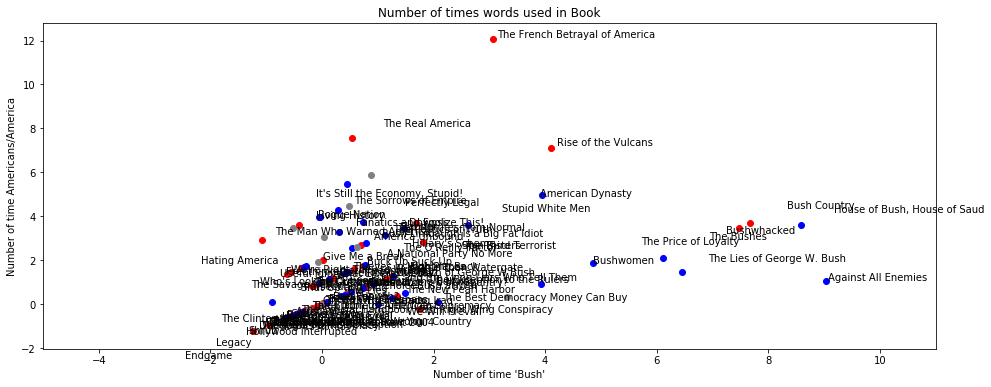

In [56]:
plot.rcParams['figure.figsize'] =[16,6]
for i , book in enumerate(df_data_profanity.index):
    mu, sigma = 0, 0.5
    z = np.random.normal(mu, sigma, 1)  # noise
    x = z + df_data_profanity.Leader.loc[book]
    y = z + df_data_profanity.Nation.loc[book]
    if book_summary_df.value[i] == 'n':
        plot.scatter(x,y,color = 'gray')
#         print(x,y)
    elif book_summary_df.value[i] == 'c':
        plot.scatter(x,y,color = 'red')
        plot.text(x+z,y+z,book_name[i])
    else:
        plot.scatter(x,y,color = 'blue')
        plot.text(x+z,y+z,book_name[i])       
    
    plot.xlim(-5,11)

plot.title("Number of times words used in Book")
plot.xlabel("Number of time 'Bush'")
plot.ylabel("Number of time Americans/America")
plot.show()

Blue => "liberal" <br>
Gray => "neutral" <br>
Red=>"conservative" <br>

We noted that majority of book summary has `America` or `Americans` , one book stand out. Few with more `bush` words but more *Liberal books* talk about `Bush` , where as *Conservative Books* talked about `America/American` more .



### Sentiment Analysis

Sentiment analysis is based on classification of the words used in the corpus. Words are grouped in two major category :
+ Polarity 
 + Polarity is the feelings of the words, it can be Positive or Negative .
 + It stand somewhere in between the ranges from -1 (Negative) to +1 (Postive).
+ Subjectivity.
 + It talks about how subjective the word 
 + The more close to 0 it is, it’s FACT and 
 + More close to 1 it’s more Opinion than the facts on the subject. 

Textblob: Textblob uses the average of the different weights given to word by different words classifiers. 

<br>
Testing with First book summary's 1st and last sentense to see the sentiments.


In [47]:
# TextBlob().sentiment
start= re.split("\.",book_summary_df.Summary[1],)[1]
end = re.split("\.",book_summary_df.Summary[1],)[-2]

print("Start", TextBlob(start).sentiment)
print("end", TextBlob(end).sentiment)

# re.split(",",book_summary_df.Summary[1],)
book_summary_df.Summary[1], start,end

Start Sentiment(polarity=0.06818181818181818, subjectivity=0.7272727272727273)
end Sentiment(polarity=0.225, subjectivity=0.44999999999999996)


("As the dust settles over Baghdad, a leading expert on Iraq tells the story of the obstacles that stood between the US and the fall of Saddam \x96 and reveals that many of them came from within the US Government itself. Combining groundbreaking new research with an insider's understanding of the workings of Washington, Mylroie describes how forces within the CIA and the State Department have conspired to ly discredit crucial intelligence about Saddam Hussein's regime, from his links to al Qaeda to his development of chemical, biological, and nuclear weaponry. She charges the bureaucrats within these agencies with cynical, self\x96serving behaviour, designed to help them save face even at the expense of our national security. She describes how major elements of the case against Iraq\x96\x96from new information about the al\x96Qaeda terrorists' possible links to Iraq, to potential Iraq involvement in the fall 2001 anthrax attacks\x96\x96were suppressed or prematurely dismissed by these 

**Working with some examples :** 

In [48]:
# Polarity is between - to +1
# Subjectivity is like how strong the opinion on the topic.. 
print("This is very Great Day!","=>",TextBlob("This is very Great Day!").sentiment)
print("This is very Great Day","=>",TextBlob("This is very Great Day!").sentiment)
print("Great","=>",TextBlob("Great").sentiment)
print("no Great","=>",TextBlob("no Great").sentiment)


This is very Great Day! => Sentiment(polarity=1.0, subjectivity=0.9750000000000001)
This is very Great Day => Sentiment(polarity=1.0, subjectivity=0.9750000000000001)
Great => Sentiment(polarity=0.8, subjectivity=0.75)
no Great => Sentiment(polarity=-0.4, subjectivity=0.75)


* #### Calculating Polarity and Subjectivity for each book summary

In [60]:
dt_pol = lambda x: TextBlob(x).sentiment.polarity
dt_sub = lambda x: TextBlob(x).sentiment.subjectivity
dt_pol
book_summary_df['Polarity'] = book_summary_df.summary_final.apply(dt_pol)


df_book_sentiment = pd.DataFrame({'Book Id':book_summary_df.index,
                                  'Book_Summary': book_summary_df.Summary,
              'Book_Lebel':book_summary_df.Label,
              'Book_Value':book_summary_df.value,
              'Polarity':book_summary_df['Summary'].apply(dt_pol),
              'subjectivity':book_summary_df['Summary'].apply(dt_sub)} )

df_book_sentiment.head()

,Book Id,Book_Summary,Book_Lebel,Book_Value,Polarity,subjectivity
0,0,1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence o...,1000 Years for Revenge,n,0.169048,0.489286
1,1,"As the dust settles over Baghdad, a leading expert on Iraq tells the story of the obstacles that...",Bush vs. the Beltway,c,0.083479,0.593007
2,2,The bestselling true story of a Texas congressmans secret role in the Afghan defeat of Russian ...,Charlie Wilson's War,c,0.063312,0.441991
3,3,Journalist Rich Miniter uses his unparalleled access to sources and stories throughout the Middl...,Losing Bin Laden,c,-0.117857,0.464286
4,4,Saudi Arabia is more and more an irrational statea place that spawns global terrorism even as ...,Sleeping With the Devil,n,0.046233,0.518278


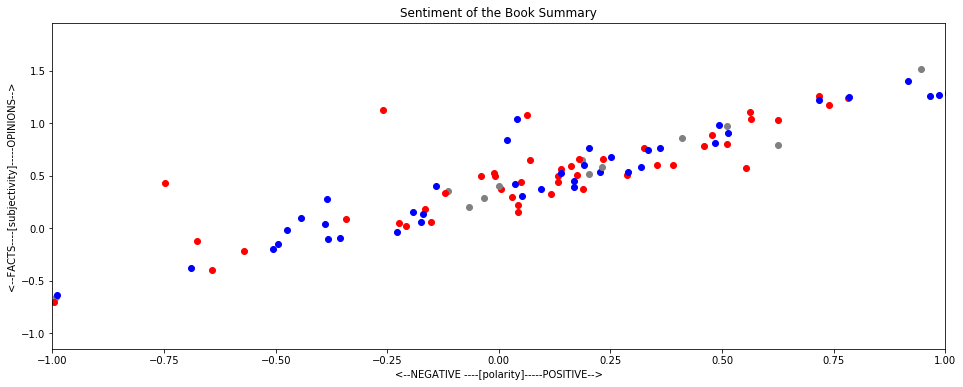

In [62]:
plot.rcParams['figure.figsize'] =[16,6]
for i , book in enumerate(df_book_sentiment.index):
    mu, sigma = 0, 0.5
    z = np.random.normal(mu, sigma, 1)  # noise
    x = z + df_book_sentiment.Polarity.loc[book]
    y = z + df_book_sentiment.subjectivity.loc[book]
    if df_book_sentiment.Book_Value[i] == 'n':
        plot.scatter(x,y,color = 'gray')
#         plot.text(x+z,y+z,book_name[i])
    elif df_book_sentiment.Book_Value[i] == 'c':
        plot.scatter(x,y,color = 'red')       
    else:
        plot.scatter(x,y,color = 'blue')
    plot.xlim(-5,100)
plot.xlim(xmin=-1,xmax=1)
plot.title("Sentiment of the Book Summary")
plot.xlabel("<--NEGATIVE ----[polarity]-----POSITIVE-->")
plot.ylabel("<--FACTS----[subjectivity]-----OPINIONS-->")
plot.show()

n :  'gray' <br>
c :  'red' <br>
l :  'blue'<br>
By full summary sentiment analysis shows that mostly all the books are Negative in Feelings, and Mejortiy of the books are .

**Now we will plot polarity and subjectivity for 1st nine book:**

1000 Years for Revenge  :  1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence of how the FBI missed dozens of opportunities to stop the attacks of September 11, dating back to 1989. Award-winning journalist Peter Lance explains how an elusive al Qaeda mastermind defeated the entire American security system in what the author calls "the greatest failure of intelligence since the Trojan Horse." Threading the stories of FBI agent Nancy Floyd, FDNY fire marshal Ronnie Bucca, and bomb-maker Ramzi Yousef, Lance uncovers the years of behind-the-scenes intrigue that put these three strangers on a collision course. An unparalleled work of investigative reporting and masterful storytelling, 1000 Years for Revenge will change forever the way we look at the FBI and the war on terror in the twenty-first century.


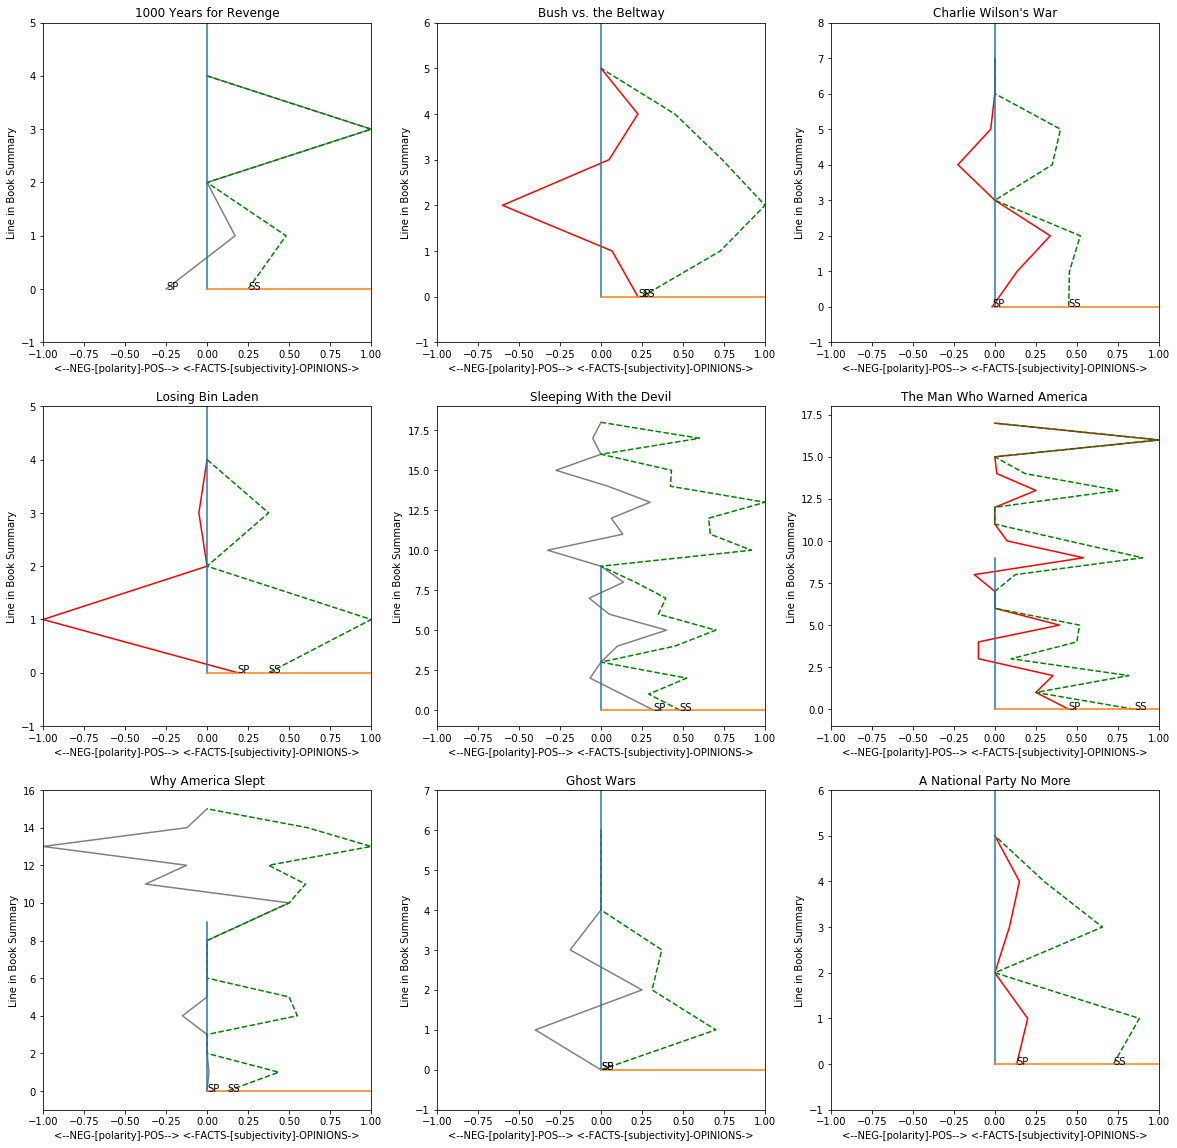

In [69]:
plot.rcParams['figure.figsize']=[20,20]
print(df_book_sentiment.Book_Lebel[0]," : ",df_book_sentiment.Book_Summary[0])
for index , book in enumerate(df_book_sentiment.index[:9]): 
    plot.subplot(3, 3, index +1) 
    start= re.split("\.",book_summary_df.Summary[index])[1]
    end = re.split("\.",book_summary_df.Summary[index])[-2]
    mu, sigma = 0, 0.5
    z = np.random.normal(mu, sigma, 1)  # noise
    pol = [ TextBlob(text).sentiment.polarity    for text in re.split("\.",book_summary_df.Summary[book])]
#     print(df_book_sentiment.Book_Value[index],pol)
    sub = [TextBlob(text).sentiment.subjectivity  for text in re.split("\.",book_summary_df.Summary[book])]
    ylen = [l for l in range(len(pol))]
    x = pol
    x1 = sub
    y = ylen
    if df_book_sentiment.Book_Value[index] == 'n':
        plot.plot(x,y,color = 'gray')
        plot.plot(x1,y,color = 'green',linestyle='--')
        
    elif df_book_sentiment.Book_Value[index] == 'c':
        plot.plot(x,y,color = 'red')  
        plot.plot(x1,y,color = 'green',linestyle='--')
    else:
        plot.plot(x,y,color = 'blue') 
        plot.plot(x1,y,color = 'green',linestyle='--')
#     plot.annotate("START",xy=(x[0],y[0]),xytext=(x[0]+0.01,y[0]-0.05),arrowprops=dict(facecolor='blue', shrink=0.1))
    plot.annotate("SP", xy=(x[0], y[0]))
    plot.annotate("SS", xy=(x1[0], y[0]))
#     plot.arrow(x[0],y[0],x[0]+.0002, y[0]+.0002)
    plot.ylim(ymin=-1,ymax=len(pol))
    plot.xlim(xmin=-1,xmax=1)
    plot.plot(np.zeros(10),np.arange(0,10))
    plot.plot(np.arange(0,10),np.zeros(10))

    plot.title(book_name[index])
    plot.xlabel("<--NEG-[polarity]-POS--> <-FACTS-[subjectivity]-OPINIONS->")
    plot.ylabel("Line in Book Summary")
plot.show()

It is intresting too see many patterns in the top selling books, only common thing I noted that mostly every book start with Positive feelings and then builds on it.  
<br> From the 2nd plot you can see how the poits are going far from each other in the center, indicating that sentiment is negative and it's from the Opinion of the author. 

### Lets see How Sentiments are distributed among the Book Type

In [71]:
df_book_sentiment.head(5)

,Book Id,Book_Summary,Book_Lebel,Book_Value,Polarity,subjectivity
0,0,1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence o...,1000 Years for Revenge,n,0.169048,0.489286
1,1,"As the dust settles over Baghdad, a leading expert on Iraq tells the story of the obstacles that...",Bush vs. the Beltway,c,0.083479,0.593007
2,2,The bestselling true story of a Texas congressmans secret role in the Afghan defeat of Russian ...,Charlie Wilson's War,c,0.063312,0.441991
3,3,Journalist Rich Miniter uses his unparalleled access to sources and stories throughout the Middl...,Losing Bin Laden,c,-0.117857,0.464286
4,4,Saudi Arabia is more and more an irrational statea place that spawns global terrorism even as ...,Sleeping With the Devil,n,0.046233,0.518278


In [65]:
GP = df_book_sentiment[['Book_Summary',"Book_Value"]].groupby('Book_Value')

In [66]:
GP.first()

,Book_Summary
Book_Value,
c,"As the dust settles over Baghdad, a leading expert on Iraq tells the story of the obstacles that..."
l,"Updated with a new afterword and including a selection of key documents, this is the explosive a..."
n,1000 Years for Revenge is a groundbreaking investigative work that uncovers startling evidence o...


In [76]:
#  [join(i) for i in ]
df_book_sentiment.Book_Value

df_book_sentiment.Book_Summary

n_book = " ".join([df_book_sentiment.Book_Summary[i] for i in range(len(df_book_sentiment )) 
                if df_book_sentiment.Book_Value[i] =="n" ])
c_book = " ".join([df_book_sentiment.Book_Summary[i] for i in range(len(df_book_sentiment )) 
                if df_book_sentiment.Book_Value[i] =="c" ])
l_book = " ".join([df_book_sentiment.Book_Summary[i] for i in range(len(df_book_sentiment )) 
                if df_book_sentiment.Book_Value[i] =="l" ])

df_book_sentiment_value= pd.DataFrame({'Type': ['n','c','l'],
              'Summary': [n_book,c_book,l_book],
              'Polarity': [TextBlob(n_book).sentiment.polarity,
                           TextBlob(c_book).sentiment.polarity,
                           TextBlob(l_book).sentiment.polarity],
              'Subjectivity': [TextBlob(n_book).sentiment.subjectivity,
                           TextBlob(c_book).sentiment.subjectivity,
                           TextBlob(l_book).sentiment.subjectivity]
             })


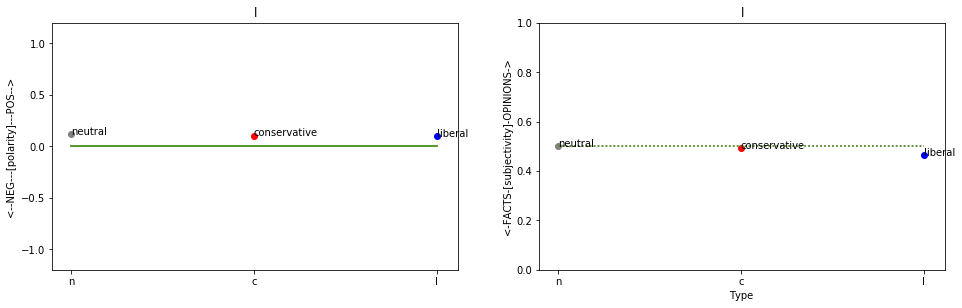

In [78]:
plot.rcParams['figure.figsize'] =[16,10]

for i in df_book_sentiment_value.index:
    plot.subplot(2, 2, 1)
    x= df_book_sentiment_value.Polarity[i]
    x1 = df_book_sentiment_value.Subjectivity[i]
    y= df_book_sentiment_value.Type[i]
    if df_book_sentiment_value.Type[i] == 'n':
        plot.scatter(y,x,color = 'gray')
        plot.annotate("neutral", xy=( y,x))
        
    elif df_book_sentiment_value.Type[i]== 'c':
        plot.scatter(y,x,color = 'red')
        plot.annotate("conservative", xy=( y,x))
    else:
        plot.scatter(y,x,color = 'blue')
        plot.annotate("liberal", xy=(y,x))
    plot.title(df_book_sentiment_value.Type[i])
    plot.plot(np.arange(0,3),np.zeros(3))
    
    plot.ylim(ymin=-1.2,ymax=1.2)
    plot.ylabel("<--NEG---[polarity]---POS--> ")

for i in df_book_sentiment_value.index:
    plot.subplot(2, 2, 2)
    x= df_book_sentiment_value.Polarity[i]
    x1 = df_book_sentiment_value.Subjectivity[i]
    y= df_book_sentiment_value.Type[i]
    if df_book_sentiment_value.Type[i] == 'n':
        plot.scatter(y,x1,color = 'gray')
        plot.annotate("neutral", xy=(y,x1))
        
    elif df_book_sentiment_value.Type[i]== 'c':
        plot.scatter(y,x1,color = 'red')
        plot.annotate("conservative", xy=(y,x1))
    else:
        plot.scatter(y,x1,color = 'blue')
        plot.annotate("liberal", xy=(y,x1))
    plot.title(df_book_sentiment_value.Type[i])
    plot.plot(np.arange(0,3),np.repeat(.5,3),linestyle=':')
    plot.ylim(ymin=0,ymax=1)
    plot.ylabel("<-FACTS-[subjectivity]-OPINIONS->")

plot.xlabel("Type ")
plot.show()

From the above graphs we can say that mostly of the books are have neutral subjectivity at the overall level, even though they may show some ups and down in sentense sentiment but overall each book's summary is based on Neutral sentiment. 
Adding positivity is also very consistent across all the types of book.

## Conclusion
Social network analysis indicates that political books bought by the same buyers in 2004 points toward two distinct clusters, according to the political leanings of the books.  Buyers who bought conservative books largely bought other conservative books.  Buyers who bought liberal books largely bought other liberal books.  The books with the highest centrality tended to be conservative and liberal books, and not neutral books.  Neutral books were disproportionately present amongst the books with the lowest degree centrality, meaning that buyers who bought those neutral books did not tend to buy other political books.

Top words across the books shows that many books share similar words.  There are 17 books that mention Bush in their summary.  Each book has use some of the most common words, and mostly all the best selling books have neutral subjectivity at the overall level, with Average Positive feelings over the book's summary. The Wordcloud gave us some meanging full insights about the books' key topics and the subject discussed in the book.

### PART 3 
[**Prediction Engine**](https://github.com/Rajwantmishra/620Group/blob/master/Final%20Project-14-17July/Final_Part3.ipynb) Open in new tab